In [1]:
#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import metrics, tree
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFECV

from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [6]:
data = pd.read_csv('data_set_cleaned.csv', header = 0, names=None)
data.head()

,Case1_Control0,Edad,Genero,Cycle Time,Stance Percent,Stance Time,Step Length,Step Number,Step Time,Step Cadence,...,Step Timel,Step Cadencel,Stride Numberl,Stride Lengthl,Swing Percentl,Swing Timel,Distancel,Duration Timel,Speedl,Accelerationl
0,Positivo,79,M,0.803979,0.644524,1.327075,0.796338,2,0.335486,58.280750,...,0.312041,88.428185,1,0.185463,0.459888,0.624083,1.890646,1.357033,1.393220,1.026666
1,Positivo,79,M,0.826989,0.633677,1.326004,0.823259,2,0.352115,57.346196,...,0.429035,59.169468,1,1.198056,0.423096,0.858070,1.923441,2.028073,0.948408,0.467640
2,Positivo,79,M,0.789131,0.610778,1.219237,0.739892,2,0.359121,60.114133,...,0.405821,56.550877,1,1.059078,0.382493,0.811643,1.974094,2.121983,0.930306,0.438414
3,Positivo,68,M,1.193026,0.536687,1.263887,0.741654,2,0.476885,50.955888,...,0.435792,50.936203,1,1.085094,0.369960,0.871583,1.951583,2.355888,0.828385,0.351623
4,Positivo,68,M,1.045567,0.508093,1.061983,0.817604,2,0.446011,57.412502,...,0.358499,59.642470,1,1.189026,0.356362,0.716997,1.858186,2.011989,0.923557,0.459027


In [7]:
x = data.loc[: , ~data.columns.isin(['Case1_Control0','Genero'])]
x = x.values

y = data['Case1_Control0'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1234)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
mlp = MLPClassifier(
    hidden_layer_sizes=(16),
    activation = 'relu',
    alpha=0.01,
    learning_rate_init=0.001,
    learning_rate='adaptive',
    max_iter=400,
    batch_size=1,
    random_state=1234,
    early_stopping=False,
    verbose=False
)

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred), ", Kappa:", metrics.cohen_kappa_score(y_test, y_pred), "\n")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.717391304347826 , Kappa: 0.4347826086956522 

             precision    recall  f1-score   support

   Negativo       0.67      0.87      0.75        23
   Positivo       0.81      0.57      0.67        23

avg / total       0.74      0.72      0.71        46



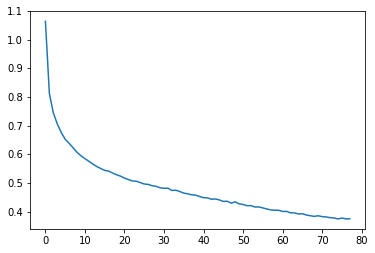

In [7]:
plt.plot(mlp.loss_curve_)

In [8]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [9]:
param_grid = {
    'hidden_layer_sizes' : [(randint.rvs(15,20,1))],
    'alpha' : uniform(0.000001,0.1),
    'learning_rate_init' : uniform(0.000001,0.1),
    'batch_size' : [1]
}
RS_MLP = RandomizedSearchCV(MLPClassifier(solver='adam', random_state=1234, max_iter=200, early_stopping=True, shuffle=True), param_distributions= param_grid, cv=10, random_state=1234,
                           scoring='accuracy', n_iter=20, n_jobs=1, verbose=True)

RS_MLP.fit(x,y)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.0min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1234,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'hidden_layer_sizes': [16], 'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000202A52F8F28>, 'learning_rate_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000202A668D1D0>, 'batch_size': [1]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=True)

In [10]:

print('Mejores parametros:\n', RS_MLP.best_params_)
print('Mejor Exactitud:\n', RS_MLP.best_score_)

Mejores parametros:
 {'alpha': 0.01915294503788923, 'batch_size': 1, 'hidden_layer_sizes': 16, 'learning_rate_init': 0.06221187710398319}
Mejor Exactitud:
 0.6758241758241759


Mejores parametros:
 {'alpha': 0.037026075479039494, 'batch_size': 1, 'hidden_layer_sizes': 19, 'learning_rate_init': 0.0561206186065625}
Mejor Exactitud:
 0.6868131868131868

In [11]:
data_pca = pd.read_csv('data_set_pca.csv', header = 0, names=None)
x_pca = data_pca.values

In [14]:
param_grid = {
    'hidden_layer_sizes' : [(randint.rvs(15,350,1))],
    'alpha' : uniform(0.000001,0.1),
    'learning_rate_init' : uniform(0.000001,0.1),
    'momentum' : [0.7,0.8,0.9],
    'nesterovs_momentum' : [ True,False],
    'batch_size' : [1]
}
RS_MLP = RandomizedSearchCV(MLPClassifier(solver='adam', random_state=12, max_iter=200, early_stopping=False, shuffle=False), param_distributions= param_grid, cv=10, random_state=1234,
                           scoring='accuracy', n_iter=15, n_jobs=1, verbose=True)

RS_MLP.fit(x_pca,y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.6min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12,
       shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=1,
          param_distributions={'hidden_layer_sizes': [766], 'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000202A66CFE80>, 'learning_rate_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000202A66CF9E8>, 'momentum': [0.7, 0.8, 0.9], 'nesterovs_momentum': [True, False], 'batch_size': [1]},
          pre_dispatch='2*n_jobs', random_state=1234, refit=True,
          return_train_score='warn', scoring='

In [13]:

print('Mejores parametros:\n', RS_MLP.best_params_)
print('Mejor Exactitud:\n', RS_MLP.best_score_)

Mejores parametros:
 {'alpha': 0.0056003448965871, 'batch_size': 1, 'hidden_layer_sizes': 322, 'learning_rate_init': 0.04426726489592228, 'momentum': 0.8, 'nesterovs_momentum': True}
Mejor Exactitud:
 0.6868131868131868


Durante el afinamiento (Método random) de parámetros se encuentra que la siguiete configuración es:

**Mejores parametros:**   
 {'alpha': 0.03648959839013723, 'batch_size': 1, 'hidden_layer_sizes': 20, 'learning_rate_init': 0.061540617843349375}  
**Mejor Exactitud:**  
 0.6978021978021978